# Proyek Analisis Data: E-commerce-public-dataset
- Nama: Rizaldi Yusuf
- Email: zalizaldiy44@gmail.com
- Id Dicoding: zalzaldiy

## Menentukan Pertanyaan Bisnis

1. Berapa banyak revenue yang dihasilkan pada tahun 2016, 2017, dan 2018?, dan
analisa lebih lanjut tahun yang mempunyai revenue tertinggi mengenai produk apa yang memiliki revenue tinggi dan rata-rata waktu transaksi order pelanggan.

2. Bagaimana persebaran customer disetiap state, dan kota?, produk apa saja yang paling banyak dibeli pelanggan berdasarkan wilayahnya?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

Dataset ini berasal merupakan E-Commerce Brazil dari tahun 2016-2018 dengan banyak data sampai dengan 100K.  

#### Customers Dataset

In [3]:
# Load and read 'customers_dataset'
customers_df = pd.read_csv('/content/drive/My Drive/Data/E-Commerce_Public_Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Orders Dataset

In [4]:
# Load and read 'orders_dataset'
orders_df = pd.read_csv('/content/drive/My Drive/Data/E-Commerce_Public_Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
# Load and read 'order_items_df'
order_items_df = pd.read_csv('/content/drive/My Drive/Data/E-Commerce_Public_Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
# Load and read 'order_reviews_dataset'
order_reviews_df = pd.read_csv('/content/drive/My Drive/Data/E-Commerce_Public_Dataset/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
# Load and read 'order_payments_dataset
order_payments_df = pd.read_csv('/content/drive/My Drive/Data/E-Commerce_Public_Dataset/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### Products Dataset

In [8]:
# Load and read 'products_dataset'
products_df = pd.read_csv('/content/drive/My Drive/Data/E-Commerce_Public_Dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
# Load and read 'products_category_name_translation_dataset'
products_cnt_df = pd.read_csv('/content/drive/My Drive/Data/E-Commerce_Public_Dataset/product_category_name_translation.csv')
products_cnt_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Seller Dataset

In [10]:
# Load and read 'sellers_dataset'
sellers_df = pd.read_csv('/content/drive/My Drive/Data/E-Commerce_Public_Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### Geolocation Dataset

In [11]:
# Load and read 'geolocation_dataset'
geo_df = pd.read_csv('/content/drive/My Drive/Data/E-Commerce_Public_Dataset/geolocation_dataset.csv')
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Assessing Data

#### Customers Dataset

In [12]:
# Check 'customers_dataset' info
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
# Print num missing values of 'customers_dataset'
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
# Check duplicated row in 'customers_dataset'
print("Jumlah duplikat data: ",customers_df.duplicated().sum())
# Check descriptive statistics
customers_df.describe(include='all')

Jumlah duplikat data:  0


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


#### Orders Dataset

In [15]:
# Check 'orders_dataset' info
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Tipe data** tanggal order **tidak datetime**:
* order_purchase_timestamp
* order_approved_at
* order_delivered_carrier_date
* order_delivered_customer_date
* order_estimated_delivery_date

In [16]:
# Print num missing values of 'orders_dataset'
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

terdapat **missing values**:
* order_approved_at = 160
* order_delivered_carrier_date = 1783
* order_delivered_customer_date = 2965

In [17]:
# Check duplicated row in 'orders_dataset'
print("Jumlah duplikat data: ",orders_df.duplicated().sum())
# Check descriptive statistics
orders_df.describe(include='all')

Jumlah duplikat data:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [18]:
# Check 'order_items_dataset' info
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


kolom **shipping_limit_date** tidak bertipe datetime

In [19]:
# Check duplicated row in 'order_items_dataset'
print("Jumlah duplikat data: ",order_items_df.duplicated().sum())
# Check descriptive statistics
order_items_df.describe(include='all')

Jumlah duplikat data:  0


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [20]:
# Check 'order_reviews_dataset' info
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [21]:
# Check duplicated row in 'order_reviews_dataset'
print("Jumlah duplikat data: ",order_reviews_df.duplicated().sum())
# Check descriptive statistics
order_reviews_df.describe(include='all')

Jumlah duplikat data:  0


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [22]:
# Print num missing values of 'order_reviews_df'
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Terdapat **missing values** pada kolom **review_comment_title** & **review_comment_message** namun **tidak terlalu mempengaruhi pada data order_reviews**

In [23]:
# Check 'order_payments_dataset' info
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [24]:
# Check duplicated row in 'order_reviews_dataset'
print("Jumlah duplikat data: ",order_payments_df.duplicated().sum())
# Check descriptive statistics
order_payments_df.describe(include='all')

Jumlah duplikat data:  0


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


#### Products Data

In [25]:
# Check 'products_dataset' info
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [26]:
# Check duplicated row in 'products_dataset'
print("Jumlah duplikat data: ", products_df.duplicated().sum())
# Check descriptive statistics
products_df.describe(include='all')

Jumlah duplikat data:  0


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [27]:
# Print num missing values of 'products_dataset'
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Terlihat pattern jumlah missing value yang sama

In [28]:
# Check 'products_cnt_dataset' info
products_cnt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [29]:
# Check duplicated row in 'products_cnt_dataset'
print("Jumlah duplikat data: ", products_cnt_df.duplicated().sum())
# Check descriptive statistics
products_cnt_df.describe(include='all')

Jumlah duplikat data:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Sellers Data

In [30]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [31]:
# Check duplicated row in 'sellers_dataset'
print("Jumlah duplikat data: ", sellers_df.duplicated().sum())
# Check descriptive statistics
sellers_df.describe(include='all')

Jumlah duplikat data:  0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


#### Geolocation Data

In [32]:
# Check 'geolocation_dataset' info
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [33]:
# Check duplicated row in 'geolocation_dataset'
print("Jumlah duplikat data: ", geo_df.duplicated().sum())
# Check descriptive statistics
geo_df.describe(include='all')

Jumlah duplikat data:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [34]:
# Print duplicated data
geo_df[geo_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [35]:
# Removing duplicated data
geo_df = geo_df.drop_duplicates()
print("Jumlah duplikat data: ", geo_df.duplicated().sum())

Jumlah duplikat data:  0


In [36]:
geo_df.shape

(738332, 5)

### Cleaning Data

#### Orders Data

##### orders_df

In [37]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [38]:
# Convert type data to datetime
columns = ["order_approved_at", 'order_delivered_carrier_date',
                    'order_delivered_customer_date', 'order_estimated_delivery_date']

for i in columns:
  orders_df[i] = pd.to_datetime(orders_df[i])

In [39]:
column = ["order_purchase_timestamp"]

for i in column:
  orders_df[i] = pd.to_datetime(orders_df[i])
  orders_df[i] = orders_df[i].dt.strftime("%H:%M")

In [40]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10:56,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,20:41,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,08:38,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,19:28,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,21:18,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [41]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.1+ MB


In [42]:
orders_df[orders_df['order_approved_at'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,15:26,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,13:54,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,12:14,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,16:27,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,16:12,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,15:38,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,15:02,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,11:16,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,16:13,NaT,NaT,NaT,2018-10-01


Terlihat ketiga feature missing value order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date selalu berpasangan

In [43]:
# Sorting 'order_approved_at' berdasarkan ascending
orders_df = orders_df.sort_values('order_approved_at')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,12:16,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04
64058,1ff217aa612f6cd7c4255c9bfe931c8b,b3a9bf200375f53cc5c6991919c356fd,delivered,09:16,2016-10-04 09:43:32,2016-10-21 16:33:45,2016-10-24 16:33:45,2016-11-24
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,21:01,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25
6747,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,22:31,2016-10-04 10:19:23,2016-10-08 10:34:01,2016-10-14 16:08:00,2016-11-23
67037,ed8c7b1b3eb256c70ce0c74231e1da88,da0ba2a9935bca5b4610b0e3bca9d3b4,delivered,09:59,2016-10-04 10:25:46,2016-11-11 15:29:14,2016-11-18 08:51:07,2016-11-24


In [44]:
# Fill null values dengan method forward fill (mengambil nilai dari row sebelumnya)
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(method='ffill')

In [45]:
# Sorting 'order_delivered_carrier_date' berdasarkan ascending
orders_df = orders_df.sort_values('order_delivered_carrier_date')

In [46]:
# Fill null values dengan forward fill
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(method='ffill')

In [47]:
# Sorting 'order_delivered_customer_date' berdasarkan ascending
orders_df = orders_df.sort_values('order_delivered_customer_date')

In [48]:
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(method='ffill')

In [49]:
# Check missing values
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Missing values pada data sudah diatasi

##### order_reviews_df

In [50]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Karena terlalu banyak nilai missing values pada feature 'review_comment_title' dan 'review_comment_message' maka feature dilakukan drop/hapus.

In [51]:
order_reviews_df_clean = order_reviews_df.drop(['review_comment_title', 'review_comment_message'], axis=1)

In [52]:
date_column = ['review_creation_date']

for i in date_column:
  order_reviews_df_clean[i] = pd.to_datetime(order_reviews_df_clean[i])
  order_reviews_df_clean[i] = order_reviews_df_clean[i].dt.date
  order_reviews_df_clean[i] = pd.to_datetime(order_reviews_df_clean[i])

In [53]:
date_column = ['review_answer_timestamp']

for i in date_column:
  order_reviews_df_clean[i] = pd.to_datetime(order_reviews_df_clean[i])
  order_reviews_df_clean[i] = order_reviews_df_clean[i].dt.strftime("%H")

In [54]:
order_reviews_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.8+ MB


#### Merge Data Order

In [55]:
orders_df1 = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
orders_df2 = pd.merge(
    left=orders_df1,
    right=order_payments_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
orders_join_df = pd.merge(
    left=orders_df2,
    right=order_reviews_df_clean,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

In [56]:
orders_join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117329 non-null  object        
 1   customer_id                    117329 non-null  object        
 2   order_status                   117329 non-null  object        
 3   order_purchase_timestamp       117329 non-null  object        
 4   order_approved_at              117329 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117329 non-null  datetime64[ns]
 6   order_delivered_customer_date  117329 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117329 non-null  datetime64[ns]
 8   order_item_id                  117329 non-null  int64         
 9   product_id                     117329 non-null  object        
 10  seller_id                      117329 non-null  object        
 11  

#### Products Data

In [57]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [58]:
products_df[products_df['product_category_name'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


Nilai null values 'product_category_name' selalu berpasangan dengan nilai null ketiga feature; 'product_name_lenght', 'product_description_lenght' dan	'product_photos_qty'

In [59]:
products_df.shape

(32951, 9)

Karena jumlah missing values sedikit maka dilakukan drop row

In [60]:
# Drop the missing values of 'products_df'
products_clean_df = products_df.dropna()

In [61]:
# Check missing values
products_clean_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### Merge products data

In [62]:
products_join_df = pd.merge(
    left=products_clean_df,
    right=products_cnt_df,
    how="inner",
    left_on="product_category_name",
    right_on="product_category_name"
)

In [63]:
products_join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32327 entries, 0 to 32326
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32327 non-null  object 
 1   product_category_name          32327 non-null  object 
 2   product_name_lenght            32327 non-null  float64
 3   product_description_lenght     32327 non-null  float64
 4   product_photos_qty             32327 non-null  float64
 5   product_weight_g               32327 non-null  float64
 6   product_length_cm              32327 non-null  float64
 7   product_height_cm              32327 non-null  float64
 8   product_width_cm               32327 non-null  float64
 9   product_category_name_english  32327 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.7+ MB


#### Merge all data

In [64]:
orders_products_df = pd.merge(
    left=orders_join_df,
    right=products_join_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)

sellers_orders_products_df = pd.merge(
    left=orders_products_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

all_df = pd.merge(
    left=sellers_orders_products_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

In [65]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115608 entries, 0 to 115607
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115608 non-null  object        
 1   customer_id                    115608 non-null  object        
 2   order_status                   115608 non-null  object        
 3   order_purchase_timestamp       115608 non-null  object        
 4   order_approved_at              115608 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115608 non-null  datetime64[ns]
 6   order_delivered_customer_date  115608 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115608 non-null  datetime64[ns]
 8   order_item_id                  115608 non-null  int64         
 9   product_id                     115608 non-null  object        
 10  seller_id                      115608 non-null  object        
 11  

## Exploratory Data Analysis (EDA)

### Explore Orders & Products data

In [66]:
all_df['order_year'] = all_df['order_approved_at'].dt.year
all_df['order_month'] = all_df['order_approved_at'].dt.month_name()

#### Revenue over 3 years

In [67]:
df1 = all_df.groupby(by=['order_year']).agg({
  'order_id' : 'nunique',
  'payment_value': 'sum'
}).round(0).astype(int).sort_values(by='payment_value',ascending=False).reset_index()

In [68]:
df1.rename(columns={
    'order_id' : 'num_of_order',
    'payment_value': 'revenue'
}, inplace=True)

In [69]:
df1

,order_year,num_of_order,revenue
0,2018,52859,10920815
1,2017,43352,8933614
2,2016,304,73143


Tahun **2018** memiliki revenue penjualan tertinggi senilai **$10,920,815** dengan total **transaksi order sebanyak 62792** kali

In [70]:
def round_sum(x):
  return round(x.sum(), 0).astype(int)

all_df[(all_df['order_year']==2018)].groupby(by=['product_category_name_english']).agg({
  'payment_value': round_sum
}).sort_values(by='payment_value',ascending=False).reset_index().head(10)

,product_category_name_english,payment_value
0,health_beauty,1026947
1,bed_bath_table,911564
2,computers_accessories,883722
3,watches_gifts,851318
4,sports_leisure,742754
5,furniture_decor,742593
6,housewares,697046
7,auto,451415
8,garden_tools,353073
9,office_furniture,351899


Kategori produk yang memiliki revenue tertinggi pada tahun 2018 adalah **'health_beauty'** dengan nilai **$1,026,947**

In [71]:
all_df.groupby(by=['product_category_name_english']).agg({
  'payment_value': round_sum
}).sort_values(by='payment_value',ascending=False).reset_index().head(10)

,product_category_name_english,payment_value
0,bed_bath_table,1725466
1,health_beauty,1646293
2,computers_accessories,1592612
3,furniture_decor,1427214
4,watches_gifts,1420682
5,sports_leisure,1390582
6,housewares,1091709
7,garden_tools,834757
8,auto,802255
9,cool_stuff,772617


Kategori produk yang memiliki revenue tertinggi selama tahun 2016—2018 adalah **'bed_bath_table'** dengan nilai **$1,725,466**

#### Produk yang banyak dan sedikit dibeli oleh pelanggan

In [72]:
df2 = all_df.groupby(by='product_category_name_english').agg({
    'product_id': 'count',
}).sort_values(by="product_id",ascending=False).reset_index()
df2.rename(columns={
    'product_category_name_english' : 'product_category',
    'product_id' : 'num_of_order'
}, inplace=True)

In [73]:
print('Top 10 produk yang paling banyak dibeli oleh pelanggan :\n')
df2.head(10)

Top 10 produk yang paling banyak dibeli oleh pelanggan :



,product_category,num_of_order
0,bed_bath_table,11847
1,health_beauty,9944
2,sports_leisure,8942
3,furniture_decor,8743
4,computers_accessories,8105
5,housewares,7331
6,watches_gifts,6161
7,telephony,4692
8,garden_tools,4558
9,auto,4356


Produk yang paling banyak dibeli selama tahun 2016—2018 adalah **'bed_bath_table'** dengan jumlah transaksi order sebanyak
**11847**

In [74]:
df3 = all_df.groupby(by='product_category_name_english').agg({
    'product_id': 'count',
}).sort_values(by="product_id").reset_index()
df3.rename(columns={
    'product_category_name_english' : 'product_category',
    'product_id' : 'num_of_order'
}, inplace=True)

In [75]:
df3.head(10)

,product_category,num_of_order
0,security_and_services,2
1,fashion_childrens_clothes,8
2,cds_dvds_musicals,14
3,la_cuisine,15
4,arts_and_craftmanship,24
5,home_comfort_2,28
6,flowers,31
7,fashion_sport,31
8,diapers_and_hygiene,39
9,music,40


10 produk yang paling sedikit dibeli oleh pelanggan selama tahun 2016—2018

### Explore Customers, Orders, & Products data

#### Persebaran transaksi pelanggan tiap daerah

In [76]:
df4 = all_df.groupby(by=['customer_state']).agg({
    'order_id': 'nunique',
    'payment_value' : round_sum
}).sort_values(by='order_id', ascending=False).reset_index()
df4.rename(columns={
    'order_id': 'transaction_count',
    'payment_value' : 'revenue'
}, inplace=True)

In [77]:
df4.head(10)

,customer_state,transaction_count,revenue
0,SP,40536,7502927
1,RJ,12410,2708839
2,MG,11297,2288950
3,RS,5330,1129938
4,PR,4902,1055748
5,SC,3526,769745
6,BA,3277,780335
7,DF,2084,430127
8,ES,1981,390841
9,GO,1946,459466


Wilayah yang melakukan transaksi terbanyak adalah wilayah **'SP'** atau Sao Paulo dengan **40536 kali** dan total revenue yang dihasilkan adalah sebesar **$7,502,927**

In [78]:
df5 = all_df[(all_df['customer_state']=='SP')].groupby(by=['customer_state', 'customer_city']).agg({
    'order_id': 'nunique',
    'payment_value' : round_sum
}).sort_values(by='order_id', ascending=False).reset_index()
df5.rename(columns={
    'order_id': 'order_count',
    'payment_value' : 'revenue'
}, inplace=True)

In [79]:
df5.head(10)

,customer_state,customer_city,order_count,revenue
0,SP,sao paulo,15045,2807526
1,SP,campinas,1398,262096
2,SP,guarulhos,1150,199504
3,SP,sao bernardo do campo,907,147765
4,SP,santo andre,778,120695
5,SP,osasco,731,118611
6,SP,santos,691,147826
7,SP,sao jose dos campos,674,106499
8,SP,sorocaba,613,102686
9,SP,jundiai,546,119403


kota **sao paulo** merupakan kota yang memiliki transaksi terbanyak di wilayah **'SP'** dengan jumlah **15045** kali transaksi order dengan total revenue sebesar **$2,807,526**

In [80]:
def get_time(x):
    return (
        "morning" if "04:01" <= x <= "11:59"
        else
        "noon" if "12:00" <= x <= "13:00"
        else
        "afternoon" if "13:01" <= x <= "17:59"
        else
        "evening" if "18:00" <= x <= "19:59"
        else
        "night" if "20:00" <= x <= "23:59"
        else
        "late night"
    )

In [81]:
all_df['order_purchase_time'] = all_df['order_purchase_timestamp'].map(get_time)

In [82]:
all_df[['order_purchase_timestamp', 'order_purchase_time']].head()

,order_purchase_timestamp,order_purchase_time
0,13:11,afternoon
1,13:11,afternoon
2,14:13,afternoon
3,19:30,evening
4,11:27,morning


In [83]:
df6 = all_df.groupby(by='order_purchase_time').agg({
    'order_id': 'nunique'
}).sort_values(by='order_id', ascending=False).reset_index()
df6.rename(columns={
    'order_id': 'transaction_count'
}, inplace=True)

In [84]:
df6

,order_purchase_time,transaction_count
0,afternoon,31327
1,morning,21965
2,night,21730
3,evening,11401
4,noon,5893
5,late night,4199


banyaknya transaksi dilakukan pada waktu **'afternoon'** **dimulai jam 13:01 sampai 17:59**, dengan total transaksi **31327** kali

In [85]:
df7 = all_df.groupby(by='order_month').agg({
    'order_id': 'nunique'
}).sort_values(by='order_id', ascending=False).reset_index()
df7.rename(columns={
    'order_id': 'transaction_count'
}, inplace=True)

In [86]:
df7

,order_month,transaction_count
0,August,10768
1,May,10516
2,July,9911
3,March,9661
4,June,9257
5,April,8936
6,February,8167
7,January,7628
8,November,7146
9,December,5598


banyaknya transaksi order terjadi pada bulan **Agustus** dengan jumlah **10768** kali transaksi

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Berapa banyak revenue yang dihasilkan pada tahun 2016, 2017, dan 2018?, dan
analisa lebih lanjut tahun yang mempunyai revenue tertinggi mengenai produk apa yang memiliki revenue tinggi dan rata-rata waktu transaksi order pelanggan.

In [87]:
rev_by_year_df = df1.copy()
rev_by_year_df

,order_year,num_of_order,revenue
0,2018,52859,10920815
1,2017,43352,8933614
2,2016,304,73143


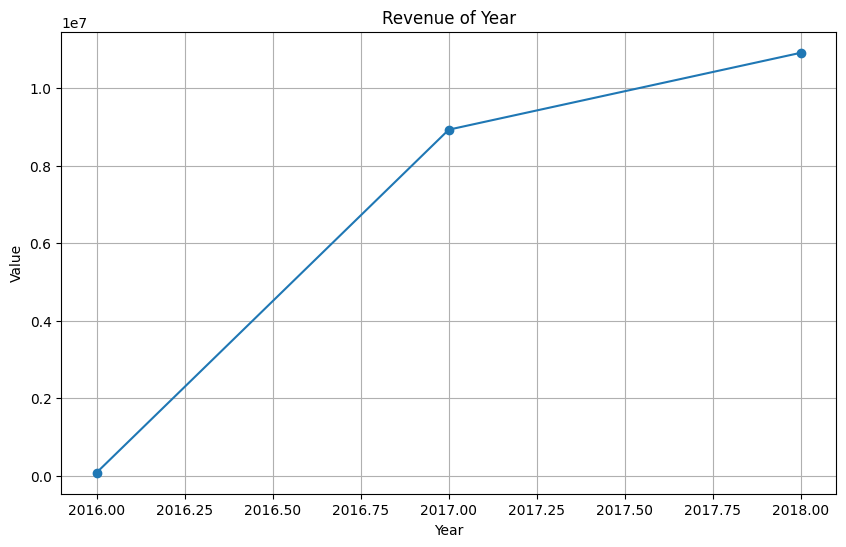

In [88]:
plt.figure(figsize=(10, 6))
plt.plot('order_year', 'revenue', data=rev_by_year_df, marker='o', linestyle='-')
plt.title('Revenue of Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()

Tahun **2018** memiliki revenue penjualan tertinggi senilai **$10,920,815** dengan total transaksi order sebanyak **52859**

In [106]:
by_2018product_df = all_df[(all_df['order_year']==2018)].groupby(by=['product_category_name_english']).agg({
  'review_score' : 'mean',
  'product_id' : 'count',
  'payment_value': round_sum
}).sort_values(by='payment_value',ascending=False).reset_index()
by_2018product_df.rename(columns={
    'product_category_name_english' : 'product_category',
    'review_score' : 'review_score_avg',
    'product_id' : 'qty_count',
    'payment_value': 'revenue'
}, inplace=True)

In [107]:
by_2018product_df.head(10)

,product_category,review_score_avg,qty_count,revenue
0,health_beauty,4.151824,6086,1026947
1,bed_bath_table,3.875611,6142,911564
2,computers_accessories,3.889095,4860,883722
3,watches_gifts,3.982433,3814,851318
4,sports_leisure,4.043002,4651,742754
5,furniture_decor,3.909409,4283,742593
6,housewares,4.050627,4227,697046
7,auto,4.100482,2697,451415
8,garden_tools,4.041453,1954,353073
9,office_furniture,3.444321,898,351899


Kategori produk yang banyak dibeli oleh pelanggan pada tahun 2018 adalah **'health_beauty'** dengan **average review produk 4.1**, **total transaksi order sebanyak 6086** kali dan total **revenue yang dihasilkan adalah $1,026,947**

In [91]:
by2018_time = all_df[(all_df['order_year']==2018)].groupby(by='order_purchase_time').agg({
    'order_id': 'nunique'
}).sort_values(by='order_id', ascending=False).reset_index()
by2018_time.rename(columns={
    'order_id': 'transaction_count'
}, inplace=True)

In [92]:
by2018_time

,order_purchase_time,transaction_count
0,afternoon,17216
1,morning,12319
2,night,11617
3,evening,6328
4,noon,3237
5,late night,2142


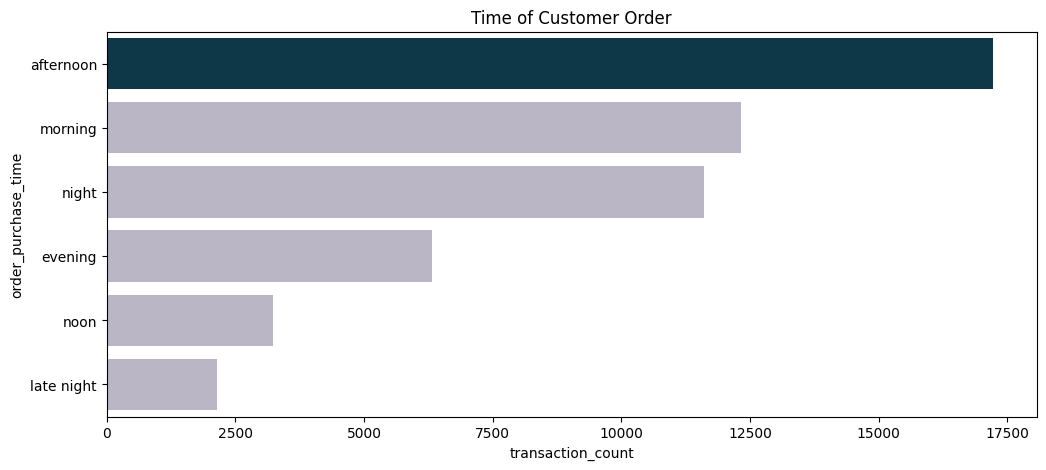

In [93]:
colors=['#053B50', '#B9B4C7', '#B9B4C7', '#B9B4C7', '#B9B4C7', '#B9B4C7']
plt.figure(figsize=(12, 5))
sns.barplot(x='transaction_count', y='order_purchase_time', data=by2018_time, orient='h',
            order=by2018_time['order_purchase_time'], palette=colors)
plt.xlabel('transaction_count')
plt.ylabel('order_purchase_time')
plt.title('Time of Customer Order')
plt.show()


Pada tahun 2018 banyaknya transaksi dilakukan pada waktu **'afternoon'** **dimulai jam 13:01 sampai 17:59**, dengan total transaksi **17216** kali

In [94]:
by_month_df = all_df[(all_df['order_year']==2018)].groupby(by='order_month').agg({
    'order_id': 'nunique'
}).sort_values(by='order_id', ascending=False).reset_index()
by_month_df.rename(columns={
    'order_id': 'transaction_count'
}, inplace=True)

In [95]:
by_month_df

,order_month,transaction_count
0,March,7085
1,May,6971
2,January,6896
3,April,6653
4,August,6548
5,February,6509
6,June,6111
7,July,6072
8,September,14


Pada tahun 2018 banyaknya transaksi order terjadi pada bulan **Maret** dengan jumlah **7085** kali transaksi

### Pertanyaan 2:

Bagaimana persebaran customer disetiap state, dan kota?, produk apa saja yang paling banyak dibeli pelanggan berdasarkan wilayahnya?

In [96]:
dist_byState = all_df.groupby(by=['customer_state']).agg({
    'customer_unique_id': 'nunique',
}).sort_values(by='customer_unique_id', ascending=False).reset_index()
dist_byState.rename(columns={
    'customer_unique_id': 'customer_count'
}, inplace=True)

In [97]:
dist_byState.head(10)

,customer_state,customer_count
0,SP,39192
1,RJ,11974
2,MG,10948
3,RS,5150
4,PR,4748
5,SC,3431
6,BA,3181
7,DF,2022
8,ES,1916
9,GO,1883


State dengan jumlah Customer/Pelanggan terbanyak berada di **'SP'** dengan total **39192 Pelanggan**

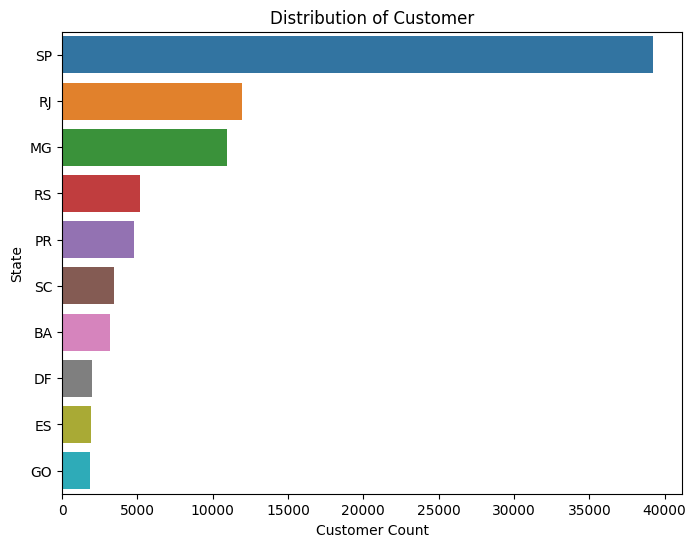

In [98]:
vis_dist_byState=dist_byState.head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x='customer_count', y='customer_state', data=vis_dist_byState, orient='h',
            order=vis_dist_byState['customer_state'])
plt.xlabel('Customer Count')
plt.ylabel('State')
plt.title('Distribution of Customer')
plt.show()

In [99]:
dist_byCity = all_df[(all_df['customer_state']=='SP')].groupby(by=['customer_city']).agg({
    'customer_unique_id': 'nunique',
}).sort_values(by='customer_unique_id', ascending=False).reset_index()
dist_byCity.rename(columns={
    'customer_unique_id': 'customer_count'
}, inplace=True)

In [100]:
dist_byCity.head(10)

,customer_city,customer_count
0,sao paulo,14529
1,campinas,1358
2,guarulhos,1116
3,sao bernardo do campo,880
4,santo andre,751
5,osasco,704
6,santos,673
7,sao jose dos campos,650
8,sorocaba,592
9,jundiai,529


Kota di state 'SP' dengan Pelanggan terbanyak berada di **'Sao Paulo'** dengan jumlah **14529 Pelanggan**

In [102]:
dist_cust_product = all_df.groupby(by=['customer_state']).agg({
    'product_category_name_english' : pd.Series.mode,
    'product_id': 'count'
}).sort_values(by='product_id', ascending=False).reset_index()
dist_cust_product.rename(columns={
    'product_id': 'qty_count'
}, inplace=True)

In [103]:
dist_cust_product.head(10)

,customer_state,product_category_name_english,qty_count
0,SP,bed_bath_table,48797
1,RJ,bed_bath_table,14987
2,MG,bed_bath_table,13429
3,RS,bed_bath_table,6412
4,PR,furniture_decor,5879
5,SC,sports_leisure,4218
6,BA,health_beauty,3942
7,DF,health_beauty,2449
8,GO,bed_bath_table,2359
9,ES,bed_bath_table,2300


Rata-rata pelanggan di beberapa wilayah membeli kategori produk **'bed_bath_table'**

## Conclusion

- Conclution pertanyaan 1
  - Revenue tertinggi berada di tahun **2018** dengan total **$10,920,815** dan **transaksi order sebanyak 52859 kali**.  
  - Pada tahun 2018 produk yang paling banyak dibeli oleh pelanggan adalah produk dengan kategori **'Health Beauty'** dengan rata-rata **review rate 4.1/5.0**, jumlah **transaksi order sebanyak 6086 kali** dan total **revenue** yang dihasilkan adalah **1,026,947 Juta dollar**
  - Pada tahun 2018, banyak pelanggan melakukan order terjadi pada waktu siang—sore hari atau **'afternoon'** **dimulai jam 13:01 sampai 17:59**
  - Pada tahun 2018, bulan **'March'** merupakan bulan yang **paling banyak memiliki total transaksi order** dengan jumlah sebanyak **7085 kali**

- conclution pertanyaan 2
  - Pada tahun 2016—2018, State dengan jumlah pelanggan terbanyak berada di **'SP'** dengan total **39192 Pelanggan**.
  - Rata-rata pelanggan di beberapa wilayah membeli kategori produk **'bed_bath_table'**
  - Kota di state 'SP' dengan Pelanggan terbanyak berada di **'Sao Paulo'** dengan jumlah **14529 Pelanggan**

In [ ]:
from google.colab import files
all_df.to_csv('all_data.csv', encoding = 'utf-8', index=False)
files.download('all_data.csv')